# 线性回归的简洁实现

通过使用深度学习框架来简洁地实现
线性回归模型
生成数据集

In [1]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

In [2]:
features[0], labels[0]

(tensor([-0.6253, -0.5113]), tensor([4.6761]))

In [3]:
d2l.synthetic_data??

Signature: d2l.synthetic_data(w, b, num_examples)
Source:   
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise.

    Defined in :numref:`sec_utils`"""
    X = d2l.normal(0, 1, (num_examples, len(w)))
    y = d2l.matmul(X, w) + b
    y += d2l.normal(0, 0.01, y.shape)
    return X, d2l.reshape(y, (-1, 1))
File:      ~/d2l/.venv/lib/python3.11/site-packages/d2l/torch.py
Type:      function

调用框架中现有的API来读取数据

In [4]:
data.TensorDataset?

Init signature: data.TensorDataset(*tensors: torch.Tensor) -> None
Docstring:     
Dataset wrapping tensors.

Each sample will be retrieved by indexing tensors along the first dimension.

Args:
    *tensors (Tensor): tensors that have the same size of the first dimension.
File:           /usr/lib/python3.11/site-packages/torch/utils/data/dataset.py
Type:           type
Subclasses:     

In [5]:
def load_array(data_arrays, batch_size, is_train=True):  
    """构造一个PyTorch数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

next(iter(data_iter))

[tensor([[ 1.1202,  0.2189],
         [ 1.4490,  1.6475],
         [-0.4231, -0.8709],
         [-1.1745, -0.6664],
         [ 0.1539,  1.0669],
         [ 0.8943, -0.3262],
         [-1.8390,  0.5515],
         [ 0.3052,  0.4726],
         [-0.0165,  0.0986],
         [-3.1437,  1.3859]]),
 tensor([[ 5.6830],
         [ 1.5222],
         [ 6.3285],
         [ 4.1253],
         [ 0.8760],
         [ 7.0880],
         [-1.3583],
         [ 3.2009],
         [ 3.8468],
         [-6.7943]])]

In [15]:
data_iter.batch_size

10

使用框架的预定义好的层

In [16]:
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))

初始化模型参数

In [26]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [28]:
net[0].weight.data

tensor([[-0.0101,  0.0193]])

计算均方误差使用的是`MSELoss`类，也称为平方$L_2$范数

In [29]:
loss = nn.MSELoss()

实例化一个`SGD`实例

In [33]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

训练过程代码与我们从零开始实现时所做的非常相似

In [34]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000325
epoch 2, loss 0.000101
epoch 3, loss 0.000100


比较生成数据集的真实参数和通过有限数据训练获得的模型参数

In [35]:
w = net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差：', true_b - b)

w的估计误差： tensor([ 0.0002, -0.0005])
b的估计误差： tensor([-0.0010])


## 练习

In [36]:
## 样本
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

## 批量大小
batch_size = 10

## 读取数据集
data_iter = load_array((features, labels), batch_size)

## 线性回归模型
net = nn.Sequential(nn.Linear(2, 1))
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

## 损失函数
loss = nn.MSELoss()

## 优化算法
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000292
epoch 2, loss 0.000101
epoch 3, loss 0.000101


In [37]:
nn.MSELoss?

Init signature: nn.MSELoss(size_average=None, reduce=None, reduction: str = 'mean') -> None
Docstring:     
Creates a criterion that measures the mean squared error (squared L2 norm) between
each element in the input :math:`x` and target :math:`y`.

The unreduced (i.e. with :attr:`reduction` set to ``'none'``) loss can be described as:

.. math::
    \ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad
    l_n = \left( x_n - y_n \right)^2,

where :math:`N` is the batch size. If :attr:`reduction` is not ``'none'``
(default ``'mean'``), then:

.. math::
    \ell(x, y) =
    \begin{cases}
        \operatorname{mean}(L), &  \text{if reduction} = \text{`mean';}\\
        \operatorname{sum}(L),  &  \text{if reduction} = \text{`sum'.}
    \end{cases}

:math:`x` and :math:`y` are tensors of arbitrary shapes with a total
of :math:`n` elements each.

The mean operation still operates over all the elements, and divides by :math:`n`.

The division by :math:`n` can be avoided if one sets ``reduction = 's

In [112]:
## 线性回归模型
net = nn.Sequential(nn.Linear(2, 1))
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

## 损失函数
loss = nn.MSELoss(reduction='sum')

## 优化算法
trainer = torch.optim.SGD(net.parameters(), lr=.003)

num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

w = net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差：', true_b - b)

epoch 1, loss 0.321570
epoch 2, loss 0.101653
epoch 3, loss 0.101396
w的估计误差： tensor([-4.9829e-04, -2.9325e-05])
b的估计误差： tensor([-0.0009])


In [128]:
## 线性回归模型
net = nn.Sequential(nn.Linear(2, 1))
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

## 损失函数
loss = nn.HuberLoss()

## 优化算法
trainer = torch.optim.SGD(net.parameters(), lr=.4)

num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

w = net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差：', true_b - b)

epoch 1, loss 0.000054
epoch 2, loss 0.000062
epoch 3, loss 0.000052
w的估计误差： tensor([-1.5690e-03, -2.1458e-06])
b的估计误差： tensor([0.0002])


### L1Loss (mean absolute error)
$$
\text{loss}(x,y)=\left|x-y\right|
$$

### MSELoss (mean squared error)

$$
\text{loss}(x,y)=(x-y)^2
$$

### SmoothL1Loss
$$
\text{loss}(x,y)=\left\{
\begin{aligned}
\frac{1}{2\beta}(x-y)^2, &\qquad\text{if} \left|x-y\right|<\beta \\
\left|x-y\right| - \frac{\beta}{2}, &\qquad\text{otherwise}
\end{aligned}
\right.
$$

In [161]:
def smoothl1(x,beta):
    t =  np.abs(x)
    if t < beta:
        return x ** 2 / 2 / beta
    else:
        return t - beta / 2

In [162]:
vsmoothl1 = np.vectorize(smoothl1)

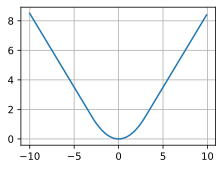

In [163]:
x = torch.arange(-10,10,0.1)
d2l.plot(x, vsmoothl1(x,3))

### HuberLoss
$$
\text{loss}(x,y)=\left\{
\begin{aligned}
\frac{1}{2}(x-y)^2, &\qquad\text{if} \left|x-y\right|<\delta \\
\delta * (\left|x-y\right| - \frac{\delta}{2}), &\qquad\text{otherwise}
\end{aligned}
\right.
$$

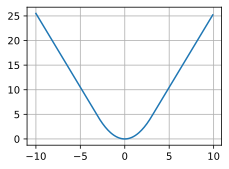

In [164]:
d2l.plot(x, vsmoothl1(x,3) * 3)

In [166]:
net[0].weight.grad

tensor([[-0.0019,  0.0056]])